In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

#from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [34]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
test_load = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Controle/O/antes/3_RS.nii').get_fdata()
test_load.shape

(64, 64, 35, 213)

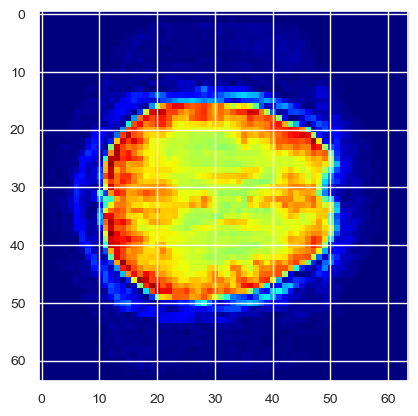

In [38]:
test = test_load[:,:,22,20]
plt.imshow(test, cmap='jet')
plt.show()

#### test = test_load[:,:,25,]
plt.imshow(test, cmap='jet')
plt.show()

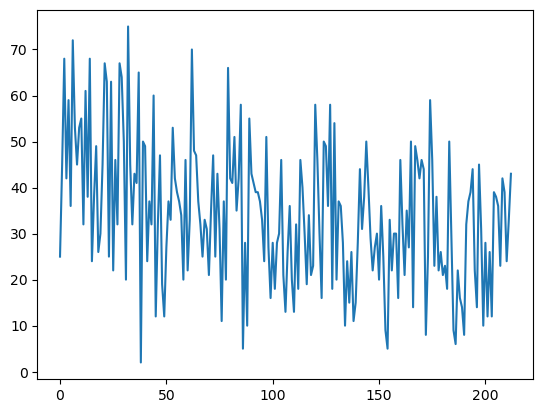

In [12]:
plt.plot(test_load[10,15,15,:])

In [277]:
GOR = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Parcels_MNI_333.nii')#.get_fdata()
test_load = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Controle/O/antes/3_RS.nii')#.get_fdata()

In [278]:
print(len(np.unique(CON.get_fdata())))

334


In [279]:
np.sum(GOR.get_fdata() == 258.)

42

334


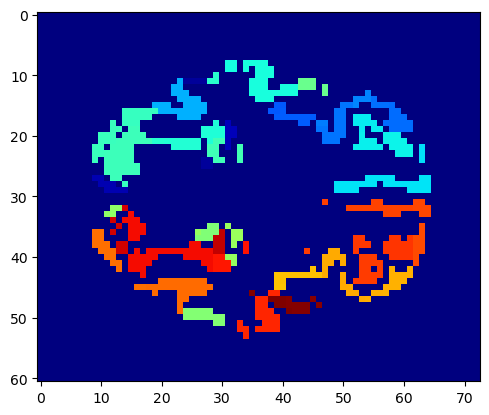

In [368]:
test = GOR.get_fdata()[:,:,20,0]
plt.imshow(test, cmap='jet')
print(len(np.unique(GOR.get_fdata())))
plt.show()

In [276]:
print(CON)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61, 1)
affine:
[[   3.    0.    0.  -90.]
 [   0.    3.    0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 4 61 73 61  1  0  0  0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Parcels_MNI_333.4dfp.ifh converted with nifti_4dfp'
aux_file        : b''
qfor

In [282]:
from nilearn import image as nimg

# Print dimensions of functional image and atlas image

print("Size of functional image:", test_load.shape)
print("Size of atlas image:", GOR.shape)

resampled_GOR = nimg.resample_to_img(GOR, test_load, interpolation = 'nearest', fill_value=0)

print('Resampled CON', resampled_GOR.shape)

Size of functional image: (64, 64, 35, 213)
Size of atlas image: (61, 73, 61, 1)
Resampled CON (64, 64, 35, 1)


In [323]:
resampled = nimg.resample_img(GOR, test_load.affine,target_shape=(64,64,35), interpolation = 'nearest', fill_value=0)
print(len(np.unique(resampled.get_fdata())))

294


### Why number of ROIs decrease?

In [283]:
print(len(np.unique(resampled_GOR.get_fdata())))

294


In [284]:
np.unique(resampled_GOR.get_fdata())

array([  0.,   1.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  36.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  44.,  45.,  47.,  49.,  51.,  52.,  53.,  54.,
        55.,  56.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  91.,  93.,  94.,  95.,  96.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       139., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162.,
       164., 165., 167., 168., 169., 170., 171., 17

Some ROIS disapear. It drops ROIS that are  empty.

334


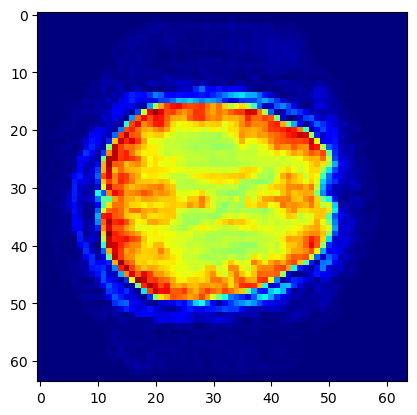

In [369]:
test = test_load.get_fdata()[:,:,22,10]
plt.imshow(test, cmap='jet')
print(len(np.unique(CON.get_fdata())))
plt.show()

334


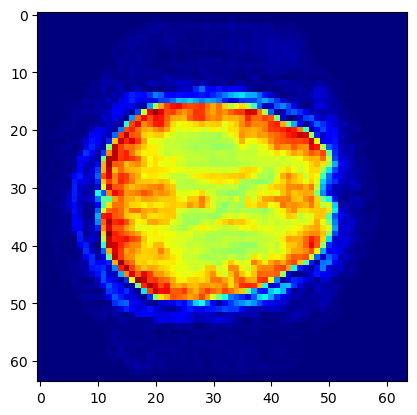

In [372]:
test = test_load.get_fdata()[:,:,22,10]
plt.imshow(test, cmap='jet')
print(len(np.unique(GOR.get_fdata())))
plt.show()

In [288]:
import numpy as np

# Get the label numbers from the atlas
atlas_labels = np.unique(resampled_GOR.get_fdata().astype(int))

# Get number of labels that we have
NUM_LABELS = len(atlas_labels)
print(NUM_LABELS)

294


In [289]:
from nilearn import input_data


masker = input_data.NiftiLabelsMasker(labels_img=resampled_GOR,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True)

In [290]:
cleaned_and_averaged_time_series = masker.fit_transform(test_load)


[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(64, 64, 35, 1),
affine=array([[-3.74837923e+00,  7.18364011e-02,  7.35904594e-02,
         1.15323997e+02],
       [ 6.20343403e-02,  3.72588336e+00, -3.69661500e-01,
        -5.88449974e+01],
       [ 9.11311727e-02,  4.18488605e-01,  3.27853410e+00,
        -6.63363953e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
)


In [291]:
cleaned_and_averaged_time_series.shape

(213, 293)

In [292]:
print(masker.labels_)
print("Number of labels", len(masker.labels_))

[1.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 47.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 93.0, 94.0, 95.0, 96.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 139.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 165.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.

In [293]:
import numpy as np

# Get the label numbers from the atlas
atlas_labels = np.unique(resampled_CON.get_fdata().astype(int))

# Get number of labels that we have
NUM_LABELS = len(atlas_labels)
print(NUM_LABELS)

294


In [294]:
# Remember fMRI images are of size (x,y,z,t)
# where t is the number of timepoints
num_timepoints = test_load.shape[3]

# Create an array of zeros that has the correct size
final_signal = np.zeros((num_timepoints, 333 + 1))# NUM_LABELS))

# Get regions that are kept
regions_kept = np.array(masker.labels_).astype(int)

# Fill columns matching labels with signal values
final_signal[:, regions_kept] = cleaned_and_averaged_time_series

# Excluding ROI = 0 that does not exist
final_signal = final_signal[:,1:]

print(final_signal.shape)

(213, 333)


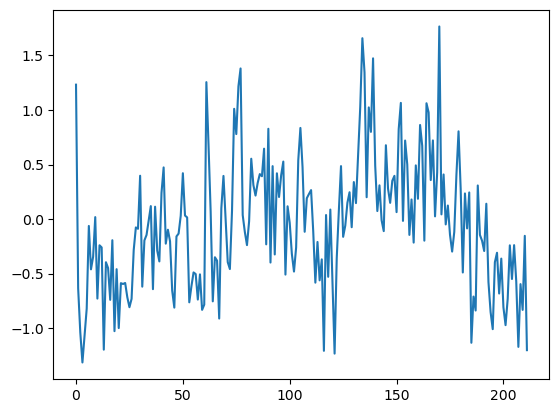

In [373]:
plt.plot(final_signal[:,2][1:])